In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np
import os
import scipy 
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import pdist

In [44]:
from explaination_config import ExplainationConfig

In [45]:
config = ExplainationConfig("biomining")

In [46]:
feature_name = config.feature_names
print(feature_name)

['ABL', 'ABLb', 'CSF1R', 'CSF1Rb', 'EGFR', 'EGFRb', 'FLT1', 'FLT1b', 'FLT4', 'FLT4b', 'KDR', 'KDRb', 'KIT', 'KITb', 'MCL1', 'MCL1b', 'NR1I2', 'NR1I2b', 'PDGFRB', 'PDGFRBb', 'RET', 'RETb', 'TOP2', 'TOP2b', 'TUB1', 'TUB1b', 'GATA3', 'NF1', 'NF2', 'P53', 'PI3K', 'PTEN', 'RAS']


In [47]:
SAVE_PATH = "ig/results/biomining_integrated_gradients.pt"
all_attributions = torch.load(SAVE_PATH, weights_only=False)


In [48]:
mean_attributions = all_attributions.mean(dim=0).squeeze().numpy()  
indices = np.argsort(mean_attributions)
top_negative = indices[:5]  
top_positive = indices[-5:]  
top_indices = np.concatenate([top_negative, top_positive])
feature_values = mean_attributions[top_indices]
feature_labels = [feature_name[i] for i in top_indices]

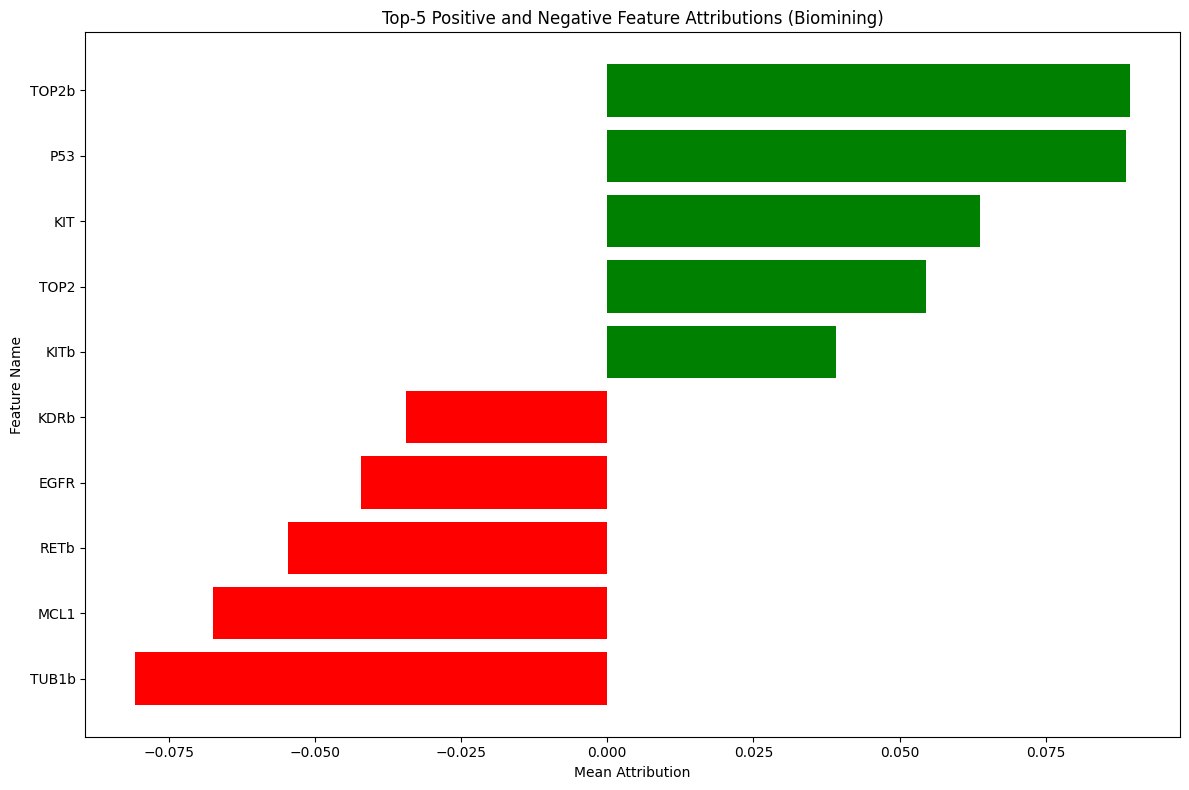

In [15]:
plt.figure(figsize=(12, 8))
plt.barh(feature_labels, feature_values, color=np.where(np.array(feature_values) < 0, 'red', 'green'))
plt.title("Top-5 Positive and Negative Feature Attributions (Biomining)")
plt.xlabel("Mean Attribution")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()
plt.close()

In [49]:
attributions_np = all_attributions.squeeze().numpy()  

variances = np.var(attributions_np, axis=0)
valid_indices = np.where(variances > 0)[0]
attributions_np_filtered = attributions_np[:, valid_indices]
feature_cols_filtered = [feature_name[i] for i in valid_indices]

correlation_matrix = np.corrcoef(attributions_np_filtered, rowvar=False)  

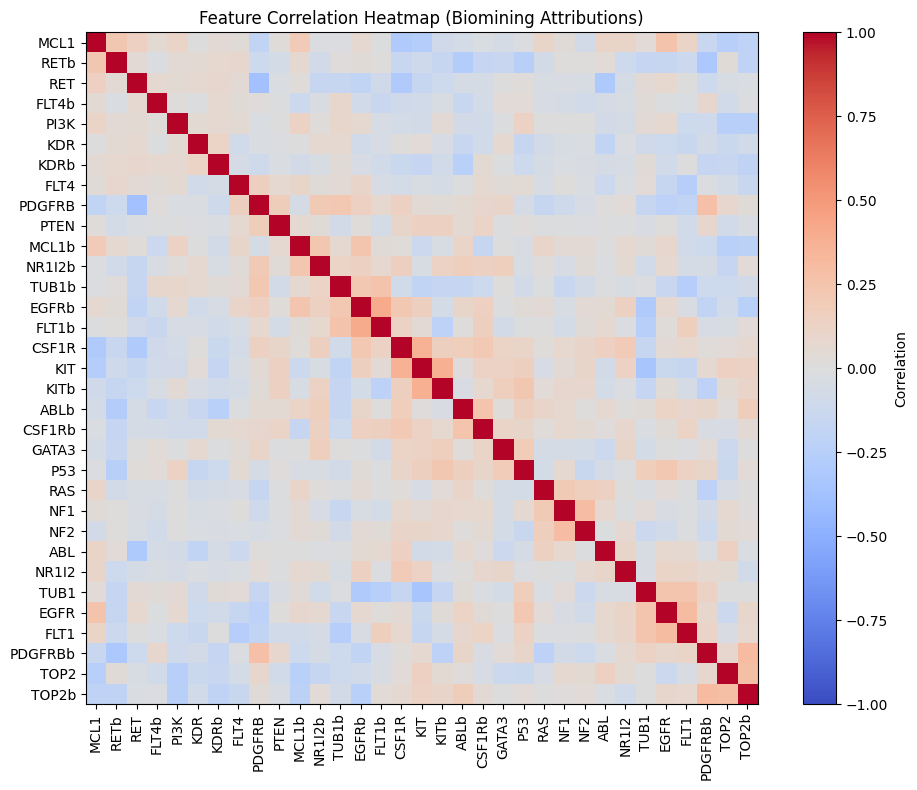

In [38]:
linkage_matrix = linkage(pdist(correlation_matrix), method='average')
order = leaves_list(linkage_matrix)
reordered_matrix = correlation_matrix[np.ix_(order, order)]
reordered_labels = [feature_cols_filtered[i] for i in order]
plt.figure(figsize=(10, 8))
plt.imshow(reordered_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(reordered_labels)), reordered_labels, rotation=90)
plt.yticks(range(len(reordered_labels)), reordered_labels)
plt.title("Feature Correlation Heatmap (Biomining Attributions)")
plt.tight_layout()
plt.show()


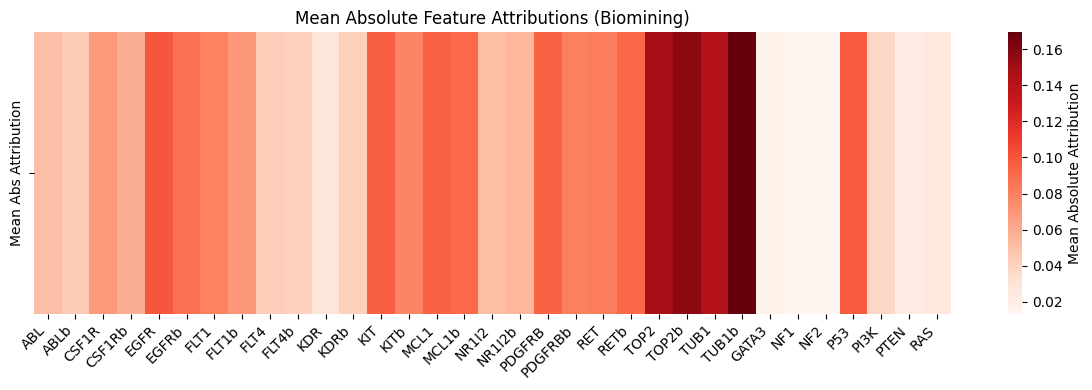

In [50]:
mean_abs_attributions = np.abs(all_attributions.squeeze().numpy()).mean(axis=0)  # Shape: [33]

plt.figure(figsize=(12, 4))
sns.heatmap(
    mean_abs_attributions.reshape(1, -1),
    cmap='Reds',
    xticklabels=feature_name,
    yticklabels=['Mean Abs Attribution'],
    cbar_kws={'label': 'Mean Absolute Attribution'},
)
plt.title("Mean Absolute Feature Attributions (Biomining)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.close()
